# Case Study 3 : Textual analysis of movie reviews

**Due Date: February 22, 2022, BEFORE the beginning of class at 2:00pm ET**

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://getthematic.com/wp-content/uploads/2018/03/Harris-Word-Cloud-e1522406279125.png">

**TEAM Members:** 


  Abigail Albuquerque

  Aria Yan

  Isabel Herrero Estrada

  Sandra Phan

  Megan Sin

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the tutorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* In particular, this case study is quite similar to "Exercise 2: Sentiment Analysis on movie reviews" on the above web page.
* Read about deep learning at https://scikit-learn.org/stable/modules/neural_networks_supervised.html


**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org).
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Getting the data onto Colab example.

In [ ]:
! wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

--2022-02-21 21:46:16--  https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  --.-KB/s    in 0.1s    

2022-02-21 21:46:16 (22.2 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]



Look for the directory txt_sentoken

In [ ]:
! tar xzf review_polarity.tar.gz
! ls

poldata.README.2.0  review_polarity.tar.gz  sample_data  txt_sentoken


## Problem 1 (10 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Installing scikit-learn using Anaconda does not necessarily download the example source-code.
* Accordingly, you may need to download these directly from Github at https://github.com/scikit-learn/scikit-learn:
    * The data can be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* Here is a direct link to the code to help you out:  https://github.com/scikit-learn/scikit-learn/tree/main/doc/tutorial/text_analytics
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involve moving around data files and/or small modifications to the script.

In [ ]:
#Download the dataset

import os
import tarfile
from contextlib import closing
from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"

if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)


Decompressing review_polarity.tar.gz


In [ ]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

if __name__ == "__main__":
    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

    # the training data folder must be passed as first argument

    path = os.path.abspath("txt_sentoken")
    dataset = load_files(path, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    # TASK: Build a vectorizer / classifier pipeline that filters out tokens
    # that are too rare or too frequent
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)

n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.01
              precision    recall  f1-score   support

         neg       0.89      0.87      0.88       251
         pos       0.87      0.90      0.88       249

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

[[219  32]
 [ 26 223]]


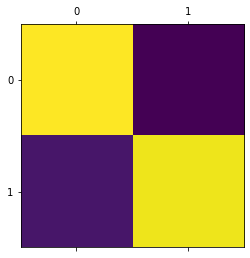

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()

## Problem 2 (10 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 

#TF-IDF is a statistic that reflects how important a word is to a group of documents

#play around with parameter of TfidfVectorizer (i.e. max_df = 2, min_df = 0.5, ngram_range = (1,2))
tfidf_vectorizer = TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs_train)

In [ ]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 
# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=['tfidf'], ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
the,0.357976
bats,0.339542
bat,0.295216
to,0.209848
town,0.179439
...,...
finchers,0.000000
fincher,0.000000
finch,0.000000
financing,0.000000


## Problem 3 (15 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer(use_idf=True, max_df = 1, ngram_range = (1,2)) 

vectorizer_fit = vectorizer.fit(docs_train)

Xtrain = vectorizer_fit.transform(docs_train)
print("Xtrain Shape")
print(Xtrain.shape)

Xtest = vectorizer_fit.transform(docs_test)
print("Xtest Shape")
print(Xtest.shape)


classifier_one = LinearSVC()
classifier_one.fit(Xtrain, y_train)


classifier_two = KNeighborsClassifier(n_neighbors=50, weights="distance")
classifier_two.fit(Xtrain, y_train)


prediction_one = classifier_one.predict(Xtest)
prediction_two = classifier_two.predict(Xtest)

print("Y test Prediction 1 - LinearSVC")
print(metrics.confusion_matrix(y_test, prediction_one))
print("Y test Prediction 2 - KNeighbors classifier")
print(metrics.confusion_matrix(y_test, prediction_two))



Xtrain Shape
(1500, 325236)
Xtest Shape
(500, 325236)
Y test Prediction 1 - LinearSVC
[[163  88]
 [ 55 194]]
Y test Prediction 2 - KNeighbors classifier
[[ 86 165]
 [ 31 218]]


The LinearSVC seems to have a better performance than KNeighbors because it had lower numbers of false positives and false negatives combined and a more even percentage of corrected positives and negatives. KNeighbors is heavily skewed towards predicting negatives. 



## Problem 4 (15 points): Use a Multi-Layer Perceptron (MLP) for classifying the reviews.  Explore the parameters for the MLP and compare the accuracies against your baseline algorithms in Problem 1.

**Read the documentation for the MLPClassifier class at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.** 
* Note: This is *very similar* to using the LinearSVC and KNeighborsClassifier classes above!
* Try different values for "hidden_layer_sizes".  What do you observe in terms of accuracy?
* Try different values for "activation". What do you observe in terms of accuracy?


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 0.0025)
vectorizer_fit = vectorizer.fit(docs_train)
Xtrain = vectorizer_fit.transform(docs_train)
Xtest = vectorizer_fit.transform(docs_test)

layer_sizes = [50, 100]
activation_strings = ["identity", "logistic", "tanh", "relu"]

for layer in layer_sizes:
    for activation_string in activation_strings:
      classifier = MLPClassifier(hidden_layer_sizes=(layer,), activation = activation_string)
      classifier.fit(Xtrain, y_train)
      y_pred = classifier.predict(Xtest)
      print("Layer size: " + str(layer) + ", Activation String: " + activation_string)
      print(metrics.confusion_matrix(y_test, y_pred))

Layer size: 50, Activation String: identity
[[215  40]
 [ 42 203]]
Layer size: 50, Activation String: logistic
[[213  42]
 [ 41 204]]
Layer size: 50, Activation String: tanh
[[215  40]
 [ 43 202]]
Layer size: 50, Activation String: relu
[[216  39]
 [ 41 204]]
Layer size: 100, Activation String: identity
[[215  40]
 [ 43 202]]
Layer size: 100, Activation String: logistic
[[214  41]
 [ 41 204]]
Layer size: 100, Activation String: tanh
[[215  40]
 [ 43 202]]
Layer size: 100, Activation String: relu
[[213  42]
 [ 43 202]]


## Problem 5 (10 points): Accuracy is not everything!  How fast are the algorithms versus their accuracy?
**Compare the runtime of your  baseline algorithms to the runtime of the MLPClassifier** 

**The jupyter command %timeit can be used to measure how long a calculation takes https://ipython.readthedocs.io/en/stable/interactive/magics.html.**
* Try different values for "hidden_layer_sizes".  What do you observe in terms of runtime?
* Try different values for "activation". What do you observe in terms of runtime?
* How long does the "fit" function take as opposed to the "predict" function?  Can you explain why?

In [ ]:
for layer in layer_sizes:
    for activation_string in activation_strings:
      classifier = MLPClassifier(hidden_layer_sizes=(layer,), activation = activation_string)
      print("Layer size: " + str(layer) + ", Activation String: " + activation_string )
      %timeit classifier.fit(Xtrain, y_train)
      %timeit classifier.predict(Xtest)

Layer size: 50, Activation String: identity
1 loop, best of 5: 17.1 s per loop
100 loops, best of 5: 10.7 ms per loop
Layer size: 50, Activation String: logistic
1 loop, best of 5: 32.4 s per loop
100 loops, best of 5: 11.3 ms per loop
Layer size: 50, Activation String: tanh
1 loop, best of 5: 18.3 s per loop
100 loops, best of 5: 11.9 ms per loop
Layer size: 50, Activation String: relu
1 loop, best of 5: 18.3 s per loop
100 loops, best of 5: 11 ms per loop
Layer size: 100, Activation String: identity
1 loop, best of 5: 29.8 s per loop
10 loops, best of 5: 20.1 ms per loop
Layer size: 100, Activation String: logistic
1 loop, best of 5: 53.8 s per loop
10 loops, best of 5: 22.3 ms per loop
Layer size: 100, Activation String: tanh
1 loop, best of 5: 29 s per loop
10 loops, best of 5: 23.7 ms per loop
Layer size: 100, Activation String: relu
1 loop, best of 5: 28.5 s per loop
10 loops, best of 5: 20.1 ms per loop



## Problem 6 (20 points): Business question

* Suppose you had a machine learning algorithm that could detect the sentiment of tweets that was highly accurate.  What kind of business could you build around that?
* Who would be your competitors, and what are their sizes?
* What would be the size of the market for your product?
* In addition, assume that your machine learning was slow to train, but fast in making predictions on new data.  How would that affect your business plan?
* How could you use the cloud to support your product?

In [ ]:
"""
Suppose you had a machine learning algorithm that could detect the sentiment of tweets that was highly accurate. 
What kind of business could you build around that?
We could build a business where our product monitors feelings on social media for companies to gage customer opinions/reviews. 
Gaging customer opinions is important for most businesses to monitor their performance, especially amongst other rival companies, 
increase customer satisfaction, maintain a good public image and optimize marketing. 

Who would be your competitors, and what are their sizes?
Our competitors would be companies with SaaS tools like MonkeyLearn (28 employees, $2.88 M in funding, $5+M in revenue per annum), 
IBM Watson (5290+ companies using, 7000+ employees, $1B+ valuation), Lexalytics (25-100 employees, 350K+funding), 
Amazon Comprehend($1B+ in revenue, 10000+ employees) among others. Our competitors are well-established companies. 

What would be the size of the market for your product?
The market for our product would be any company/organization/individual with a decently sized twitter following.

In addition, assume that your machine learning was slow to train, but fast in making predictions on new data. How would that affect your business plan?
It would negatively affect our business plan, since twitter is fast-changing platform
and it's always important for businesses to keep up with social media and current views and trends. 
To counter this issue, a few factors to consider that can make the training time run faster are  changing the optimization algorithm and 
testing data structures. We can also take advantage of the fact that it is fast in making predictions on new data. 


How could you use the cloud to support your product?
The cloud helps make machine learning more affordable. They provide cheap data storage as well as computational power. 
Since we will be working with real-time data and the need for computational power will vary depending on the traffic on the internet, 
the time of the day etc, using the cloud will be more beneficial and efficient than trying to set up our own servers. 

"""


"\nSuppose you had a machine learning algorithm that could detect the sentiment of tweets that was highly accurate. \nWhat kind of business could you build around that?\nWe could build a business where our product monitors feelings on social media for companies to gage customer opinions/reviews. \nGaging customer opinions is important for most businesses to monitor their performance, especially amongst other rival companies, \nincrease customer satisfaction, maintain a good public image and optimize marketing. \n\nWho would be your competitors, and what are their sizes?\nOur competitors would be companies with SaaS tools like MonkeyLearn (28 employees, $2.88 M in funding, $5+M in revenue per annum), \nIBM Watson (5290+ companies using, 7000+ employees, $1B+ valuation), Lexalytics (25-100 employees, 350K+funding), \nAmazon Comprehend($1B+ in revenue, 10000+ employees) among others. Our competitors are well-established companies. \n\nWhat would be the size of the market for your product?

# Slides (for a 5-8 minute presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* **Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)


*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through canvas.wpi.edu

### DS3010 Case Study 3 Team 9

        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

**Total Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 10
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 10
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 15 
    -----------------------------------
  
    -----------------------------------
    Question 4:  
    Points: 15
    -----------------------------------

    -----------------------------------
    Question 5:  
    Points: 10
    -----------------------------------

    -----------------------------------
    Question 6:  
    Points: 20
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for a 5-8 minute presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
